<a href="https://colab.research.google.com/gist/VivekChimman/96aa7cb540f864a324ec417f46dcfcd0/glaucoma_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#Creating directories
base_path="/content/drive/MyDrive/Deep Learning Project"

glaucoma_image_path=base_path+"/"+'Glaucoma'

non_glaucoma_image_path=base_path+"/"+'Non Glaucoma'


In [ ]:
#Listing out & seeing howmany images in each directories 
glaucoma_images=os.listdir(glaucoma_image_path)

non_glaucoma_images=os.listdir(non_glaucoma_image_path)

len(glaucoma_images),len(non_glaucoma_images)

(40, 40)

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["Non Glaucoma","Glaucoma"]

In [ ]:
#Preparing/getting data from directories along with corresponding labels 

all_images=[]
label=[]

H_and_B=150   #Height and breadth for image

#Getting all images of both classes in one list
for gla_img in glaucoma_images:
    gla_img_path=glaucoma_image_path+"/"+gla_img
    gla_image=plt.imread(gla_img_path)                 #read the image
    gla_image=cv2.resize(gla_image, (H_and_B,H_and_B)) #resize the image
    all_images.append(gla_image)                       #append above image in 'all_images' list 
    label.append(1)                                    #append label in 'label' list

for non_gla_img in non_glaucoma_images:
   non_gla_img_path=non_glaucoma_image_path+"/"+non_gla_img
   non_gla_image=plt.imread(non_gla_img_path)
   non_gla_image=cv2.resize(non_gla_image, (H_and_B,H_and_B))
   all_images.append(non_gla_image)
   label.append(0)



   

    

   
   
 


   

In [ ]:
type(all_images),type(label)



(list, list)

In [ ]:
#Checking howmany images we got
len(all_images), len(label)

(80, 80)

Text(0.5, 1.0, 'Non Glaucoma')

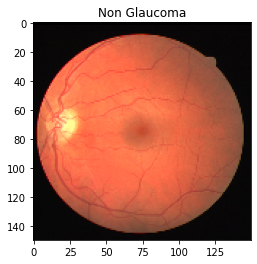

In [ ]:
#Plot an example image with it's label

index_of_choice = 79
plt.imshow(all_images[index_of_choice]) 
plt.title(class_names[label[index_of_choice]])

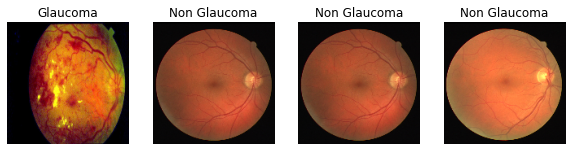

In [ ]:
 # Plot multiple random images from array
import random
plt.figure(figsize=(10, 10))
for i in range(4):
     ax = plt.subplot(1, 4, i+1)
     rand_index = random.choice(range(len(all_images)))
     plt.imshow(all_images[rand_index], cmap=plt.cm.binary)
     plt.title(class_names[label[rand_index]])
     plt.axis(False)

In [ ]:
#Splitting images into training and test datasets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(all_images, label,test_size=0.2, shuffle=True, random_state=0, stratify=label)

In [ ]:
#Checking how many images in training and test datasets
len(train_data), len(test_data)

(64, 16)

In [ ]:
#Checking the no.of train and test labels
len(train_labels), len(test_labels)

(64, 16)

In [ ]:
#Check out wether images from each class are equally splitted or not
train_labels.count(1), train_labels.count(0)

(32, 32)

In [ ]:
#converting train data and labels into array
train_data=np.array(train_data)
train_labels= np.array(train_labels)

#converting test data and labels into array
test_data=np.array(test_data)
test_labels=np.array(test_labels)

type(train_data), type(train_labels), type(test_data),type(test_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
# Show the first training example
print (f"Training sample: \n{train_data[0]} \n")
print (f"Training label: \n{train_labels[0]} \n")

Training sample: 
[[[26 26 26]
  [26 26 26]
  [26 26 26]
  ...
  [26 26 26]
  [27 29 28]
  [79 82 81]]

 [[26 26 26]
  [26 26 26]
  [26 26 26]
  ...
  [26 26 26]
  [27 29 28]
  [79 81 80]]

 [[26 26 26]
  [26 26 26]
  [26 26 26]
  ...
  [26 26 26]
  [27 29 28]
  [79 81 81]]

 ...

 [[26 26 26]
  [26 26 26]
  [26 26 26]
  ...
  [26 26 26]
  [28 28 28]
  [81 81 81]]

 [[26 26 26]
  [26 26 26]
  [26 26 26]
  ...
  [26 26 26]
  [30 30 30]
  [77 77 77]]

 [[40 40 40]
  [40 40 40]
  [40 40 40]
  ...
  [40 40 40]
  [42 42 42]
  [87 87 87]]] 

Training label: 
1 



In [ ]:
# Check out sample label. 
train_labels[40]

1

Text(0.5, 1.0, 'Glaucoma')

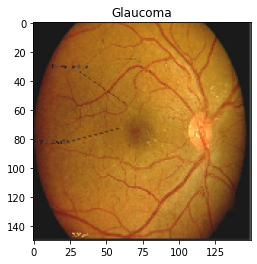

In [ ]:
#Plot a training example image with it's label
index_of_choice=0
plt.imshow(train_data[index_of_choice])
plt.title(class_names[train_labels[index_of_choice]])


In [ ]:
# Check the shape of a single training example 
train_data[0].shape, train_labels[0].shape

((150, 150, 3), ())

In [ ]:
# Check the shape of training dataset and training labels
train_data.shape, train_labels.shape

((64, 150, 150, 3), (64,))

In [ ]:
#Check out whether training datasets and labels are Arrary type or not
type(train_data), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [ ]:
#Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
#Create Logistic Regression model
LR_model= LogisticRegression(max_iter=100)

In [ ]:
(train_data.reshape(train_data.shape[0], -1)).shape,  (test_data.reshape(test_data.shape[0], -1)).shape #Use 2D arrays for training and testing 

((64, 67500), (16, 67500))

In [ ]:
# Train the Logistic Regression model
LR_model.fit(train_data.reshape(train_data.shape[0], -1) , train_labels)

LogisticRegression()

In [ ]:
# Get predicted values
LR_Model_Predicted=LR_model.predict(test_data.reshape(test_data.shape[0], -1))   


In [ ]:
#See single predicted value
LR_Model_Predicted[0]

0

In [ ]:
#Import evaluation metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Accarcy score for Logistic Regression model: 1.0
Precision score for Logistic Regression model: 1.0
Recall score for Logistic Regression model: 1.0

Classification report for Logistic Regression model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

 


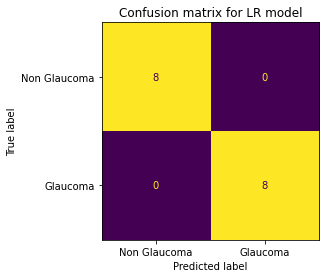

In [ ]:
#Check accuracy, precision and recall along with classification report for LR model
LR_model_accuracy_score= accuracy_score(test_labels , LR_Model_Predicted)
LR_model_precision_score = precision_score(test_labels , LR_Model_Predicted)
LR_model_recall_score = recall_score(test_labels , LR_Model_Predicted)
LR_model_classification_report=classification_report(test_labels , LR_Model_Predicted)
print(f"Accarcy score for Logistic Regression model: {LR_model_accuracy_score}")
print(f"Precision score for Logistic Regression model: {LR_model_precision_score}")
print(f"Recall score for Logistic Regression model: {LR_model_recall_score}\n")
print(f"Classification report for Logistic Regression model:\n\n {LR_model_classification_report}\n ")

#Confusion matrix for LR model
CM_for_LR_Model=ConfusionMatrixDisplay.from_predictions(test_labels , LR_Model_Predicted,display_labels=["Non Glaucoma", "Glaucoma"], colorbar=False)
plt.title("Confusion matrix for LR model")
plt.show(CM_for_LR_Model)


In [ ]:
#Impory KNN model
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
#Create KNN model
KNN_model=KNeighborsClassifier(n_neighbors=5)


In [ ]:
#Train the KNN model
KNN_model.fit(train_data.reshape(train_data.shape[0], -1), train_labels)

KNeighborsClassifier()

In [ ]:
#Get values predicted by KNN model
KNN_Model_Predicted=KNN_model.predict(test_data.reshape(test_data.shape[0], -1)) 

In [ ]:
#See the single predicted value
KNN_Model_Predicted[8]

1

Accarcy score KNN model: 0.9375
Precision score for KNN model: 1.0
Recall score for KNN model: 0.875

Classification report for KNN model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

 


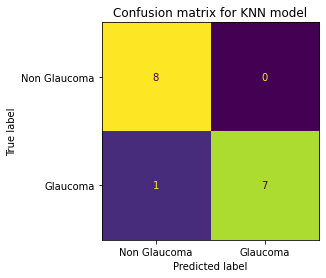

In [ ]:
#Check accuracy, precision and recall along with classification report for KNN model

KNN_model_accuracy_score= accuracy_score(test_labels , KNN_Model_Predicted)
KNN_model_precision_score = precision_score(test_labels , KNN_Model_Predicted)
KNN_model_recall_score = recall_score(test_labels , KNN_Model_Predicted)
KNN_model_classification_report=classification_report(test_labels , KNN_Model_Predicted)
print(f"Accarcy score KNN model: {KNN_model_accuracy_score}")
print(f"Precision score for KNN model: {KNN_model_precision_score}")
print(f"Recall score for KNN model: {KNN_model_recall_score}\n")
print(f"Classification report for KNN model:\n\n {LR_model_classification_report}\n ")

#Confusion matrix for KNN model
CM_for_KNN_model= ConfusionMatrixDisplay.from_predictions(test_labels ,KNN_Model_Predicted, display_labels=["Non Glaucoma", "Glaucoma"], colorbar=False )
plt.title("Confusion matrix for KNN model")
plt.show(CM_for_KNN_model)

In [ ]:
# Import SVM model
from sklearn.svm import SVC

In [ ]:
#Create SVM model
SVM_model=SVC()


In [ ]:
#Train SVM model
SVM_model.fit(train_data.reshape(train_data.shape[0], -1), train_labels)

SVC()

In [ ]:
#Get values predicted by SVM model
SVM_Model_Predicted=SVM_model.predict(test_data.reshape(test_data.shape[0], -1)) 


In [ ]:
#See single predicted value
SVM_Model_Predicted[15]

0

Accarcy score for SVM model: 1.0
Precision score for SVM model: 1.0
Recall score for SVM model: 1.0

Classification report for SVM model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

 


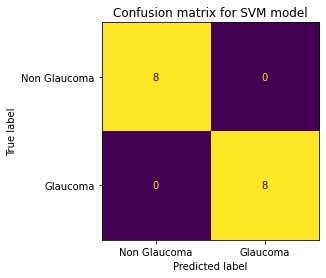

In [ ]:
#Check accuracy, precision and recall along with classification report for SVM model
SVM_model_accuracy_score= accuracy_score(test_labels , SVM_Model_Predicted)
SVM_model_precision_score = precision_score(test_labels , SVM_Model_Predicted)
SVM_model_recall_score = recall_score(test_labels , SVM_Model_Predicted)
SVM_model_classification_report=classification_report(test_labels , SVM_Model_Predicted)
print(f"Accarcy score for SVM model: {SVM_model_accuracy_score}")
print(f"Precision score for SVM model: {SVM_model_precision_score}")
print(f"Recall score for SVM model: {SVM_model_recall_score}\n")
print(f"Classification report for SVM model:\n\n {SVM_model_classification_report}\n ")

#Confusion matrix for SVM model
CM_for_SVM_model= ConfusionMatrixDisplay.from_predictions(test_labels ,SVM_Model_Predicted, display_labels=["Non Glaucoma", "Glaucoma"], colorbar=False )
plt.title("Confusion matrix for SVM model")
plt.show(CM_for_SVM_model)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(42)


In [ ]:

# Create a model 
CNN_model = tf.keras.Sequential([

#convolutional layer
tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),

#Fully connected layer
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32, activation='relu'),   # Gives better accuaracy when it's tried for 10, 128 neurons also
tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
CNN_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
#Fit the model
CNN_model.fit(train_data, train_labels,
                           epochs=20,
                           validation_data=(test_data, test_labels)
                           )



Epoch 1/20
2/2 [==============================] - 2s 866ms/step - loss: 597.9759 - accuracy: 0.4531 - val_loss: 501.4729 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 1s 735ms/step - loss: 286.2661 - accuracy: 0.5000 - val_loss: 25.5449 - val_accuracy: 0.6875
Epoch 3/20
2/2 [==============================] - 1s 758ms/step - loss: 25.2746 - accuracy: 0.6094 - val_loss: 0.7696 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 1s 735ms/step - loss: 11.4254 - accuracy: 0.4531 - val_loss: 3.2713 - val_accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 1s 732ms/step - loss: 3.1912 - accuracy: 0.6875 - val_loss: 10.7195 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 1s 738ms/step - loss: 7.9559 - accuracy: 0.5000 - val_loss: 1.4901e-08 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 1s 739ms/step - loss: 4.4271e-04 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 0.9375
Ep

In [ ]:
CNN_Model_PredProb=CNN_model.predict(test_data) 
CNN_Model_PredProb[5]                          #It is giving output in prediction probablity form, means which label has more probablity to be final output
                                                #Here label at 0th index has lower probablity where as 1st index has the larger probablity. 

array([1.0000000e+00, 2.4204737e-25], dtype=float32)

In [ ]:
1.0000000e+00, 2.4204737e-25  


(1.0, 2.4204737e-25)

Here value at 0th index is exactly equals to 1. So label at that index in class_names will be the final prediction

In [ ]:

tf.argmax(CNN_Model_PredProb[5]) #Gives index which has the larger probablity value. 

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
#Let's index this prediction probablity value on to class_names & compare with test label
class_names[test_labels[5]], class_names[tf.argmax(CNN_Model_PredProb[5])] #If both output are same means model is predicting correctly.

('Non Glaucoma', 'Non Glaucoma')

In [ ]:

# For evaluation it is necessary to have predicted values in integer form. So let's convert them to integers
CNN_Model_Predicted=CNN_Model_PredProb.argmax(axis=1)


In [ ]:
#Let's check whether both predicted values and test labels are in same form or not
CNN_Model_Predicted[:4], test_labels[:4]

(array([0, 1, 0, 0]), array([0, 1, 0, 0]))

Accarcy score for CNN_model: 1.0
Precision score for CNN_model: 1.0
Recall score for CNN_model: 1.0

Classification report for CNN_model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

 


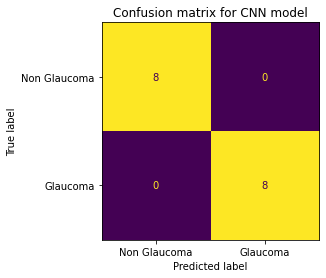

In [ ]:
#Check accuracy, precision and recall along with classification report for CNN model
CNN_model_accuracy_score= accuracy_score(test_labels , CNN_Model_Predicted)
CNN_model_precision_score = precision_score(test_labels , CNN_Model_Predicted)
CNN_model_recall_score = recall_score(test_labels , CNN_Model_Predicted)
CNN_model_classification_report=classification_report(test_labels , CNN_Model_Predicted)
print(f"Accarcy score for CNN_model: {CNN_model_accuracy_score}")
print(f"Precision score for CNN_model: {CNN_model_precision_score}")
print(f"Recall score for CNN_model: {CNN_model_recall_score}\n")
print(f"Classification report for CNN_model:\n\n {CNN_model_classification_report}\n ")

#Confusion matrix for CNN model
CM_for_CNN_model= ConfusionMatrixDisplay.from_predictions(test_labels ,CNN_Model_Predicted, display_labels=["Non Glaucoma", "Glaucoma"], colorbar=False )
plt.title("Confusion matrix for CNN model")
plt.show(CM_for_CNN_model)
